In [181]:
import pandas as pd
import matplotlib as plt
import io
import requests
import warnings

In [197]:
# Set the plot size for graphs and turn off warnings
plt.rcParams["figure.figsize"] = (15,10)
warnings.filterwarnings('ignore')

In [182]:
# Fetch the data from the Internet
def get_data():
    url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

In [183]:
#Get the data and list the attributes
df = get_data()
df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [185]:
# let's have a quick look at the first few rows
display(df.head(5))

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [186]:
# How up to date is this data?
print("Data correct as at: ", df.date.max())

Data correct as at:  2020-05-18


In [187]:
def compare_deaths_by_country(list_of_countries):
    """Take a list of country name strings, return a df of total deaths by country"""
    
    return (
        df[['location', 'total_deaths']][df.location.isin(list_of_countries)]
        [df.date == df.date.max()]
        .sort_values(by='total_deaths', ascending=False))

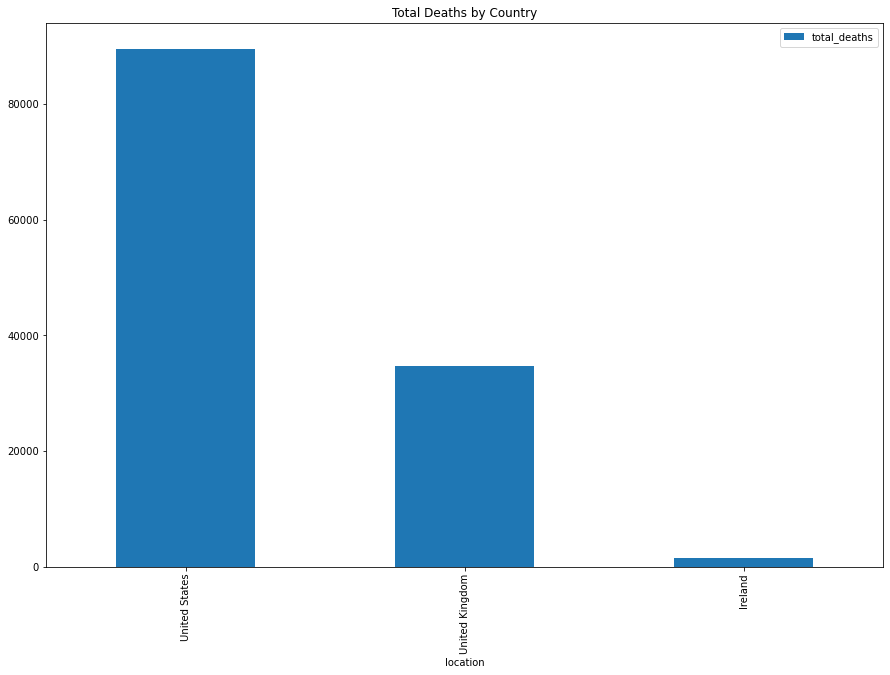

In [198]:
# Comapre total deaths for USA, UK and Ireland
compare_deaths_by_country(['United States', 'United Kingdom', 'Ireland']).plot.bar(
    x='location', y='total_deaths', title='Total Deaths by Country');


In [190]:
def total_deaths_by_country_and_population(list_of_countries):
    """Take a list of country name strings, return a df of total deaths by country, normalized by population"""
    
    return (
        df[['location', 'total_deaths_per_million']][df.location.isin(list_of_countries)]
        [df.date == df.date.max()]
        .sort_values(by='total_deaths_per_million', ascending=False))
    

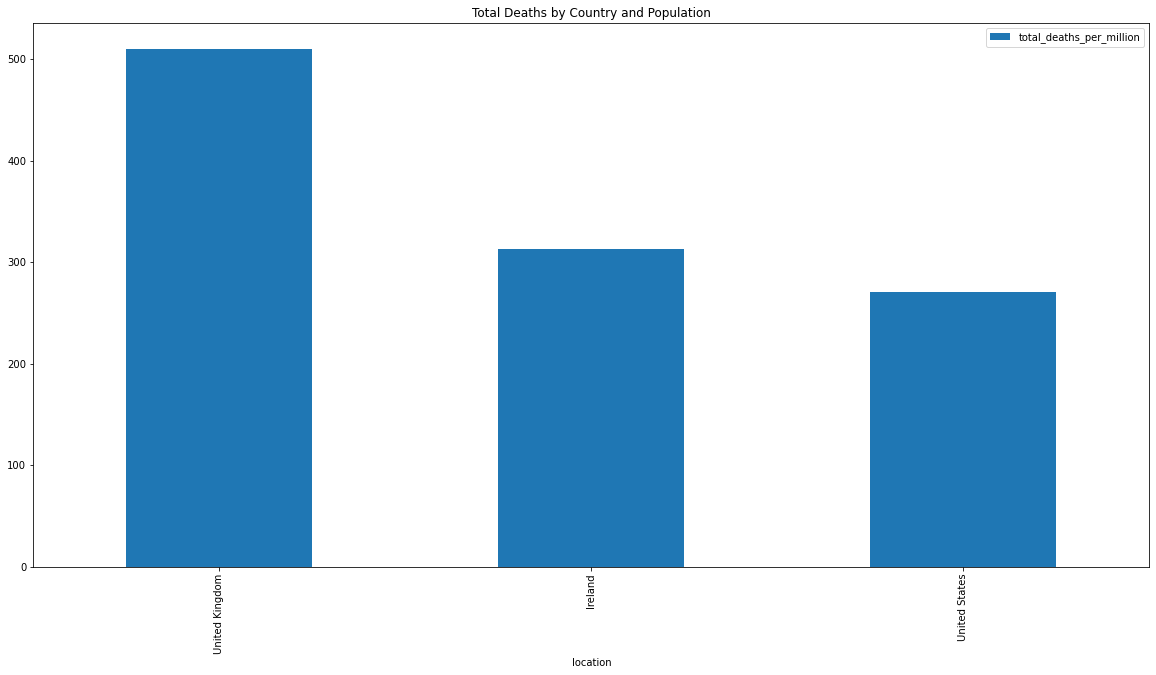

In [191]:
total_deaths_by_country_and_population(['United States', 'United Kingdom', 'Ireland']).plot.bar(
    x='location', 
    y='total_deaths_per_million', 
    title='Total Deaths by Country and Population');

In [193]:
def total_deaths_by_country_population_and_density(list_of_countries):
    """Take a list of country name strings, return a df of total deaths by country, normalized by population and density"""
    
    df_total_deaths_by_country_by_population_and_density = (
        df[['location', 'total_deaths_per_million', 'population_density']][
            df.location.isin(list_of_countries)]
        [df.date == df.date.max()])
    
    df_total_deaths_by_country_by_population_and_density['deaths_by_population_and_density'] = (
        df_total_deaths_by_country_by_population_and_density['total_deaths_per_million'] /
        df_total_deaths_by_country_by_population_and_density['population_density'])
    
    df_total_deaths_by_country_by_population_and_density = (
        df_total_deaths_by_country_by_population_and_density.sort_values(
            by='deaths_by_population_and_density', ascending=False))
    
    return df_total_deaths_by_country_by_population_and_density
    

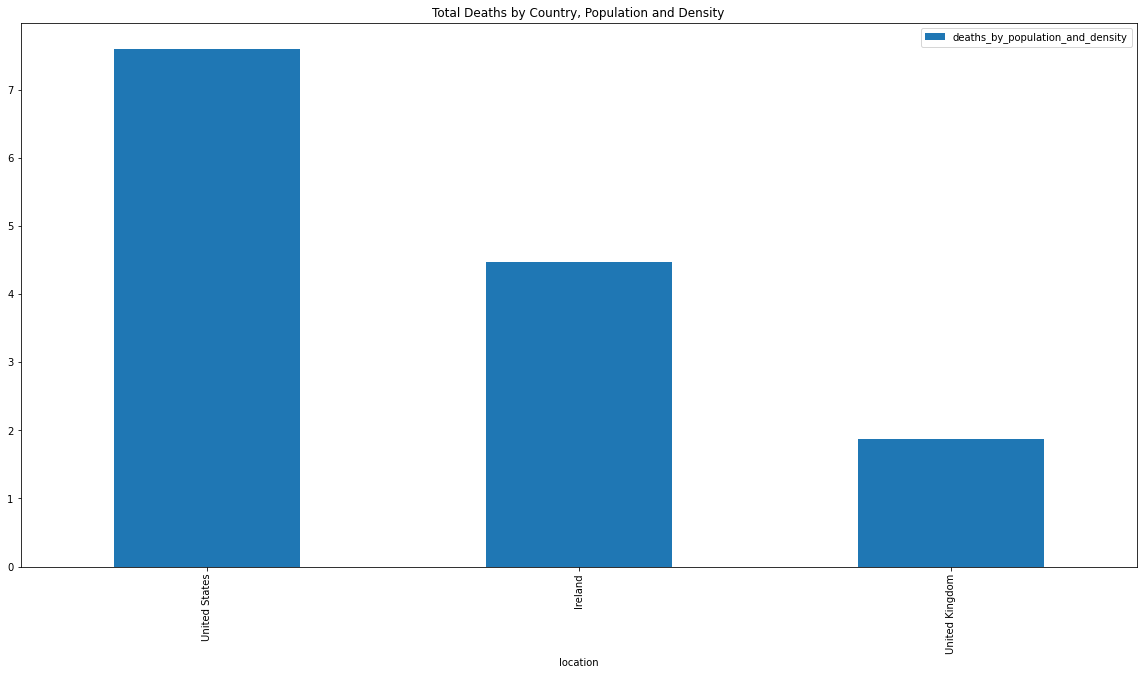

In [194]:
# Compare USA, UK and Ireland for total deaths by population and density
total_deaths_by_country_population_and_density(['United States', 'United Kingdom', 'Ireland']).plot.bar(
    x='location', 
    y='deaths_by_population_and_density', 
    title='Total Deaths by Country, Population and Density'
);

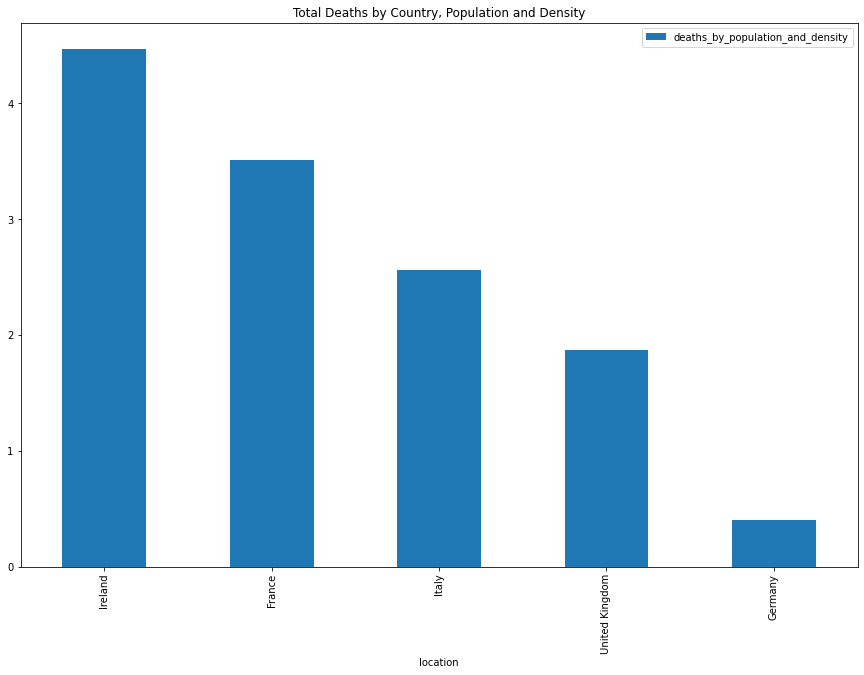

In [199]:
# Compare some of the main EU countries
(total_deaths_by_country_population_and_density(['France', 'Spain', 'Italy', 'Germany', 'United Kingdom', 'Ireland', ])
    .plot
    .bar(
        x='location', 
        y='deaths_by_population_and_density', 
        title='Total Deaths by Country, Population and Density'
    ));

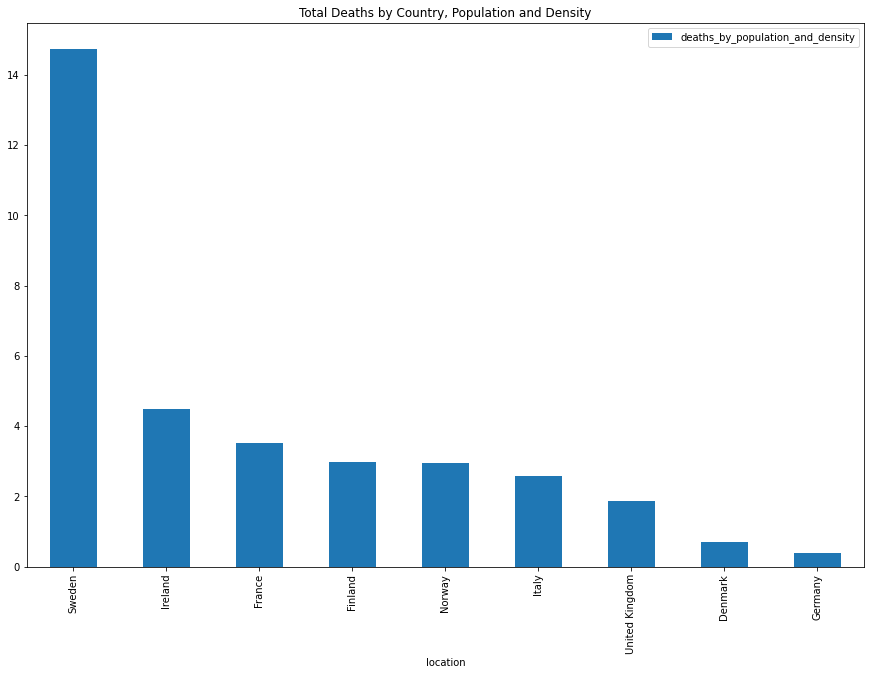

In [200]:
# Comapre with the scandinavian countries, especially sweden who did not go with a lockdown
(total_deaths_by_country_population_and_density([
    'Sweden', 'Denmark', 'Finland','Norway','France', 'Spain', 'Italy', 'Germany', 'United Kingdom', 'Ireland'])
    .plot
    .bar(
        x='location', 
        y='deaths_by_population_and_density', 
        title='Total Deaths by Country, Population and Density'
    ));

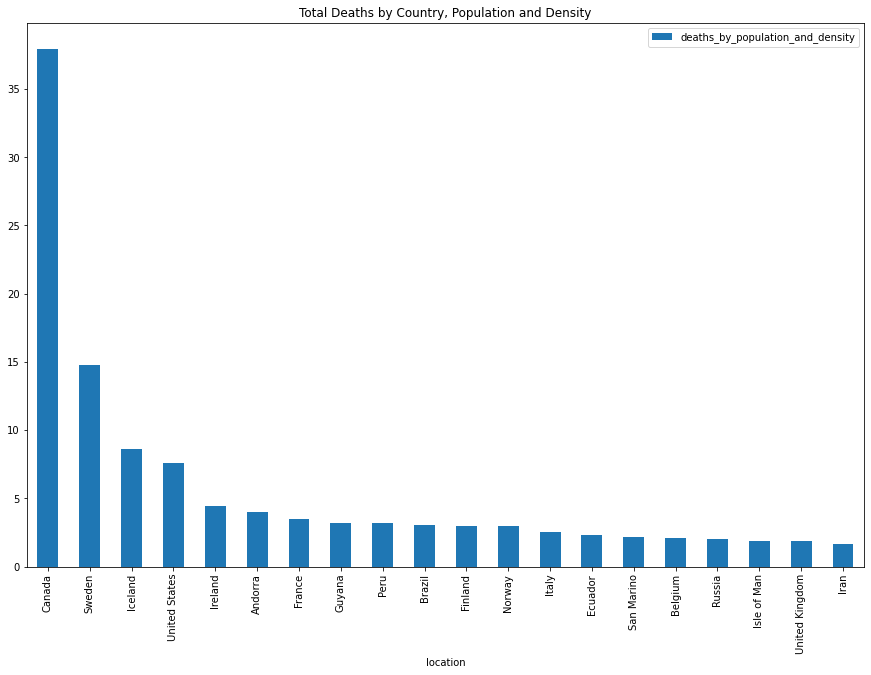

In [201]:
# Now let's look at the top 20 worst performing countries in the world
(total_deaths_by_country_population_and_density(df.location).head(20)
    .plot
    .bar(
        x='location', 
        y='deaths_by_population_and_density', 
        title='Total Deaths by Country, Population and Density'
    ));